# Nivell 1

## Exercici 1

#### Crea un np.array d'una dimensió, que inclogui l'almenys 8 nombres sencers, data type int64. Mostra la dimensió i la forma de la matriu.

In [507]:
import numpy as np

In [508]:
a = np.array([1,2,3,4,5,6,7,8], dtype='int64')

In [509]:
a.size

8

In [510]:
a.shape

(8,)

In [511]:
type(a[0])

numpy.int64

## Exercici 2

#### De la matriu de l'exercici 1, calcula el valor mitjà dels valors introduïts i resta la mitjana resultant de cada un dels valors de la matriu.

In [512]:
m = a.mean()
m

4.5

In [513]:
a-m

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

## Exercici 3

#### Crea una matriu bidimensional amb una forma de 5 x 5. Extreu el valor màxim de la matriu, i els valors màxims de cadascun dels seus eixos.

In [514]:
matrix = np.random.randint(8, 40, 25).reshape(5, 5)

In [515]:
matrix

array([[30, 24, 23, 32, 16],
       [25, 12, 10, 30, 20],
       [29, 34, 24, 16, 20],
       [26, 36, 17, 39, 37],
       [21, 37, 25, 38, 34]])

In [516]:
matrix.max()

39

In [517]:
for r in matrix:
    print(r.max())

32
30
34
39
38


In [518]:
m_transp = matrix.transpose()
m_transp

array([[30, 25, 29, 26, 21],
       [24, 12, 34, 36, 37],
       [23, 10, 24, 17, 25],
       [32, 30, 16, 39, 38],
       [16, 20, 20, 37, 34]])

In [519]:
for r in m_transp:
    print(r.max())

30
37
25
39
37


# Nivell 2

## Exercici 4

#### Mostreu-me amb exemples de diferents matrius, la regla fonamental de Broadcasting que diu : "les matrius es poden transmetre / broadcast si les seves dimensions coincideixen o si una de les matrius té una mida d'1".

#### El concepto de broadcasting determina que solo se podrá efectuar operaciones entre matrices se estas  tuvieren el mismo numero de elementos en cada dimension o si una de ellas tuvier solo 1 elemento en cada dimension:

a = ([1, 2, 3])  
b = ([7, 8, 9])  
a + b = OK

x = ([1, 2, 3])  
y = ([1])  
x + y = OK

f = ([1, 2, 3])  
g = ([1, 2])  
f + g = ERROR

#### En un caso como este, tenemos que hacer un `reshape` de una de las matrices para que esta tenga n líneas, pero solo 1 elemento por línea:

f = ([1, 2, 3])  
g = ([1, 2])  

gx = g.reshape(2, 1)  
gx = ([1],  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2])  
f + gx = OK      

#### Lo que hace numpy, utilizando el concepto de Broadcast, es 'extender' el elemento de cada línea para cuadrar con la cantidad de elementos de la matriz con la cual estamos haciendo la operación:

f = ([1, 2, 3])  
**gx = ([1, 1, 1],  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2, 2, 2])**  
f + gx = OK   

In [520]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [521]:
y = np.ones(5)
y

array([1., 1., 1., 1., 1.])

In [522]:
x+y

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [543]:
xx = x.reshape(4, 1)
xx

array([[0],
       [1],
       [2],
       [3]])

In [544]:
xx+y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [545]:
a = np.arange(3)
b = np.arange(4)

In [546]:
print(a)
print(b)

[0 1 2]
[0 1 2 3]


In [547]:
a+b

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [548]:
bx = b.reshape(4, 1)
bx

array([[0],
       [1],
       [2],
       [3]])

In [549]:
a+bx

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [550]:
ax = a.reshape(3, 1)
ax

array([[0],
       [1],
       [2]])

In [551]:
w = ax+b
w

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

## Exercici 5

#### Utilitza la Indexació per extreure els valors d'una columna i una fila de la matriu. I suma els seus valors.

In [552]:
w[0][2]+w[-1][-1]

7

## Exercici 6

#### Mask la matriu anterior, realitzeu un càlcul booleà vectoritzat, agafant cada element i comprovant si es divideix uniformement per quatre.

#### Això retorna una matriu de mask de la mateixa forma amb els resultats elementals del càlcul.

In [553]:
masked_w = np.ma.masked_array(w, mask=[[True, False, False, False], 
                   [False, False, False, False],
                   [False, False, False, True]])

In [556]:
masked_w/4

masked_array(
  data=[[--, 0.25, 0.5, 0.75],
        [0.25, 0.5, 0.75, 1.0],
        [0.5, 0.75, 1.0, --]],
  mask=[[ True, False, False, False],
        [False, False, False, False],
        [False, False, False,  True]],
  fill_value=1e+20)

## Exercici 7

#### A continuació, utilitzeu aquesta màscara per indexar a la matriu de números original. Això fa que la matriu perdi la seva forma original, reduint-la a una dimensió, però encara obteniu les dades que esteu cercant.

In [564]:
w[~masked_w.mask]

array([1, 2, 3, 1, 2, 3, 4, 2, 3, 4])

# Nivell 3

#### Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. adoneu-vos que les imatges RGB (Red, Green, Blue) són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), una per cada color de nombres enters int8, manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat.

Ajuda:Importeu, import matplotlib.image as mpimg. estudieu el metodde mpimg.imread()

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [523]:
img = mpimg.imread('C:/Users/xizes/pexels-eileen-lamb-3225487.jpg')

In [524]:
img

array([[[ 24,  23,  21],
        [ 24,  23,  21],
        [ 23,  22,  20],
        ...,
        [ 22,  22,  20],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       [[ 24,  23,  21],
        [ 23,  22,  20],
        [ 22,  21,  19],
        ...,
        [ 23,  22,  20],
        [ 23,  21,  22],
        [ 23,  21,  22]],

       [[ 25,  24,  22],
        [ 23,  22,  20],
        [ 22,  21,  19],
        ...,
        [ 23,  22,  20],
        [ 23,  21,  22],
        [ 23,  21,  22]],

       ...,

       [[ 24,  23,  19],
        [ 24,  23,  19],
        [ 24,  23,  19],
        ...,
        [161, 119,  71],
        [165, 122,  77],
        [169, 126,  81]],

       [[ 22,  21,  17],
        [ 22,  21,  17],
        [ 22,  21,  17],
        ...,
        [163, 120,  69],
        [162, 119,  68],
        [161, 117,  68]],

       [[ 22,  21,  17],
        [ 22,  21,  17],
        [ 22,  21,  17],
        ...,
        [161, 118,  67],
        [160, 117,  66],
        [159, 115,  66]]

In [525]:
img.shape

(610, 640, 3)

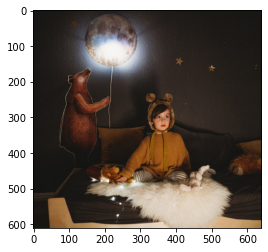

In [526]:
plt.imshow(img)

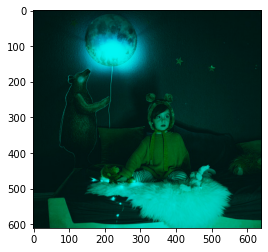

In [527]:
green = img*[0, 1, 1]
plt.imshow(green)

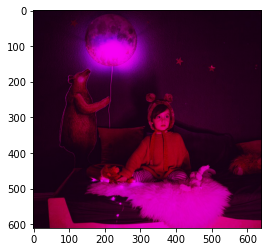

In [528]:
red = img*[1, 0, 1]
plt.imshow(red)

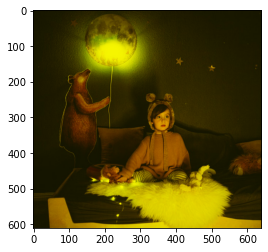

In [529]:
yellow = img*[1, 1, 0]
plt.imshow(yellow)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


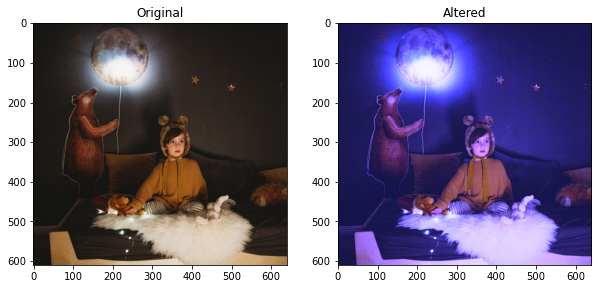

In [530]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original')
ax.imshow(img)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Altered')
ax.imshow(img*[1, 1, 4])

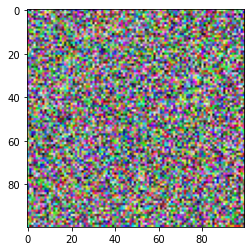

In [531]:
u = np.random.randint(0, 255, 30000).reshape(100, 100, 3)
plt.imshow(u)

## Exercici 8

#### Mostreu-me a veure que passa quan eliminem el canal G Verd o B Blau. Hauries d'utilitzar la indexació per seleccionar el canal que voleu anul·lar.

In [532]:
img[::, ::, 0].shape

(610, 640)

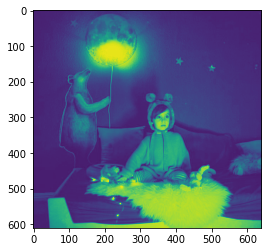

In [533]:
plt.imshow(img[::, ::, 0])

In [534]:
img[::, ::, 1]

array([[ 23,  23,  22, ...,  22,  22,  22],
       [ 23,  22,  21, ...,  22,  21,  21],
       [ 24,  22,  21, ...,  22,  21,  21],
       ...,
       [ 23,  23,  23, ..., 119, 122, 126],
       [ 21,  21,  21, ..., 120, 119, 117],
       [ 21,  21,  21, ..., 118, 117, 115]], dtype=uint8)

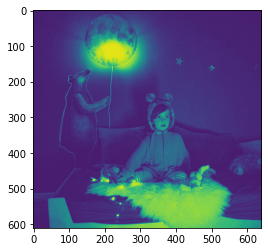

In [535]:
plt.imshow(img[::, ::, 1])

In [536]:
img[::, ::, 2]

array([[21, 21, 20, ..., 20, 22, 22],
       [21, 20, 19, ..., 20, 22, 22],
       [22, 20, 19, ..., 20, 22, 22],
       ...,
       [19, 19, 19, ..., 71, 77, 81],
       [17, 17, 17, ..., 69, 68, 68],
       [17, 17, 17, ..., 67, 66, 66]], dtype=uint8)

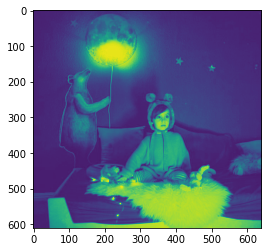

In [537]:
plt.imshow(img[::, ::, 0])

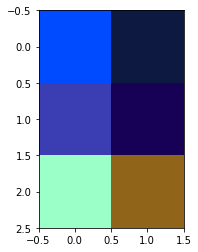

In [538]:
plt.imshow([[[0, 75, 255],[14, 25, 65]],
            [[58, 62, 178],[23, 1, 87]],
            [[155, 255, 200],[144, 100, 25]]
           ])

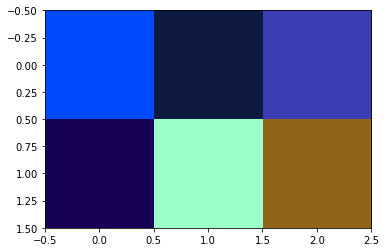

In [539]:
plt.imshow([[[0, 75, 255],
            [14, 25, 65],
            [58, 62, 178]],
            [[23, 1, 87], 
            [155, 255, 200],
            [144, 100, 25]]
           ])

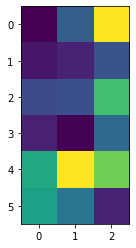

In [540]:
plt.imshow([[0, 75, 255],[14, 25, 65],
            [58, 62, 178],[23, 1, 87],
            [155, 255, 200],[144, 100, 25]
           ])

#### Utilitzar el mètode, mpimg.imsave () de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.

In [567]:
green = np.array(green, dtype='uint8')
red = np.array(red, dtype='uint8')
yellow = np.array(yellow, dtype='uint8')

In [568]:
mpimg.imsave('C:/Users/xizes/green.jpg', green)
mpimg.imsave('C:/Users/xizes/red.jpg', red)
mpimg.imsave('C:/Users/xizes/yellow.jpg', yellow)